# FEATURE SELECTIONS

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [84]:
df = pd.read_csv('input/df_preprocessed.csv')
df.shape

(307511, 144)

In [85]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
print("nombre de variables catégorielle :", len(cat_cols), end="\n")


nombre de variables catégorielle : 9


In [86]:
cat_cols

['CNT_CHILDREN',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

# Test Khi-2 : Sélection des variables catégorielles


In [87]:
y = df['TARGET']
chi_ls = []
for feature in cat_cols:
    
    # create contingency table
    c = pd.crosstab(y, df[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

H0 : Les variables X et Y sont indépendantes.  
Au seuil de 1%, si p-value <= 0.01 alors hypothèse nulle rejetée.  
Ici la variable 'WEEKDAY_APPR_PROCESS_START' sera supprimée


                            p_value
NAME_INCOME_TYPE              0.000
OCCUPATION_TYPE               0.000
NAME_EDUCATION_TYPE           0.000
NAME_FAMILY_STATUS            0.000
NAME_CONTRACT_TYPE            0.000
NAME_HOUSING_TYPE             0.000
CNT_CHILDREN                  0.000
NAME_TYPE_SUITE               0.000
WEEKDAY_APPR_PROCESS_START    0.017


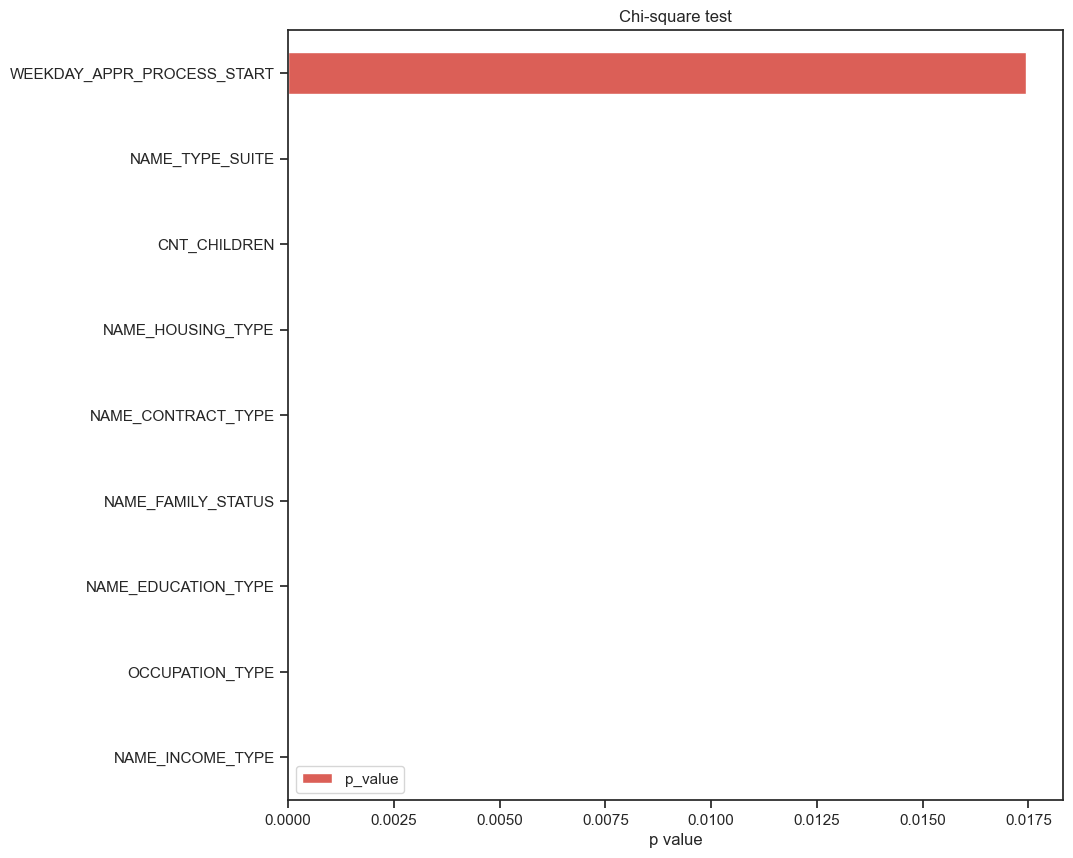

In [89]:
sns.set(style="ticks", rc={'figure.figsize': (10, 10)}, palette="hls")

df_pvalue = pd.DataFrame(chi_ls, index=df.select_dtypes(include='object').columns, columns=['p_value']).sort_values(by='p_value', ascending=True)

pd.set_option('display.float_format', '{:,.3f}'.format)
print(df_pvalue)

df_pvalue.plot.barh()
plt.xlabel('p value')
plt.title('Chi-square test')
plt.show()

In [44]:
df.drop(labels='WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)


In [45]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 143 columns):
 #    Column                                        Non-Null Count   Dtype  
---   ------                                        --------------   -----  
 0    SK_ID_CURR                                    307511 non-null  float64
 1    CNT_CHILDREN                                  307511 non-null  object 
 2    AMT_INCOME_TOTAL                              307511 non-null  float64
 3    AMT_CREDIT                                    307511 non-null  float64
 4    AMT_ANNUITY                                   307511 non-null  float64
 5    REGION_POPULATION_RELATIVE                    307511 non-null  float64
 6    DAYS_BIRTH                                    307511 non-null  float64
 7    DAYS_EMPLOYED                                 307511 non-null  float64
 8    DAYS_REGISTRATION                             307511 non-null  float64
 9    DAYS_ID_PUBLISH                    

In [46]:
y = df['TARGET']

df.drop(labels='TARGET', axis=1, inplace=True)

# Variables Catégorielles Ordinales

In [47]:
# Map to numeric CNT_CHILDREN
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].astype('category')


In [48]:
# df.info(verbose=True)
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].cat.as_ordered()
print(df['CNT_CHILDREN'], end="\n\n\n")
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].cat.codes


0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307511, dtype: category
Categories (3, object): ['0' < '1' < '2 or more']




In [49]:
df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0    215371
1     61119
2     31021
Name: count, dtype: int64

In [50]:
cat_columns = df.select_dtypes(include='object').columns.to_list()
print(cat_columns)

['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [51]:
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)


In [52]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 166 columns):
 #    Column                                        Non-Null Count   Dtype  
---   ------                                        --------------   -----  
 0    SK_ID_CURR                                    307511 non-null  float64
 1    CNT_CHILDREN                                  307511 non-null  int8   
 2    AMT_INCOME_TOTAL                              307511 non-null  float64
 3    AMT_CREDIT                                    307511 non-null  float64
 4    AMT_ANNUITY                                   307511 non-null  float64
 5    REGION_POPULATION_RELATIVE                    307511 non-null  float64
 6    DAYS_BIRTH                                    307511 non-null  float64
 7    DAYS_EMPLOYED                                 307511 non-null  float64
 8    DAYS_REGISTRATION                             307511 non-null  float64
 9    DAYS_ID_PUBLISH                    

# Remove inf values

In [ ]:
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)


In [80]:
df['TARGET'] = y

In [81]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 167 columns):
 #    Column                                        Non-Null Count   Dtype  
---   ------                                        --------------   -----  
 0    SK_ID_CURR                                    307511 non-null  float64
 1    CNT_CHILDREN                                  307511 non-null  int8   
 2    AMT_INCOME_TOTAL                              307511 non-null  float64
 3    AMT_CREDIT                                    307511 non-null  float64
 4    AMT_ANNUITY                                   307511 non-null  float64
 5    REGION_POPULATION_RELATIVE                    307511 non-null  float64
 6    DAYS_BIRTH                                    307511 non-null  float64
 7    DAYS_EMPLOYED                                 307511 non-null  float64
 8    DAYS_REGISTRATION                             307511 non-null  float64
 9    DAYS_ID_PUBLISH                    

# Export DF

In [82]:
df.to_csv('input/df_final.csv', encoding='utf-8', index=None)


In [79]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


# Split Train Data : Train, Test, Validation

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.3, random_state=101)

X_train.shape, X_test.shape

((215257, 166), (92254, 166))

# Scaling des variables

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df.drop(labels=['SK_ID_CURR'], axis=1))

X_train_scaled = scaler.transform(X_train.drop(labels='SK_ID_CURR', axis=1))
X_test_scaled = scaler.transform(X_test.drop(labels='SK_ID_CURR', axis=1))

In [71]:
df.columns.to_series()[np.isinf(df).any()]


Series([], dtype: object)

In [74]:
# vérification
X_train_scaled.mean(), X_train_scaled.std()

(np.float64(0.22191359115058235), np.float64(0.3553878991205184))

# RFE : Recursive Feature Selection

In [ ]:
sel_ = RFE(RandomForestClassifier(n_estimators=10, random_state=101))
sel_.fit(X_train_scaled, y_train)

In [ ]:
sel_.get_support()